In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [293]:
# Importing data
df_train = pd.read_excel('C:\\Users\\harip\\Desktop\\Projects\\data\\flight\\data_train.xlsx')
df_test = pd.read_excel('C:\\Users\\harip\\Desktop\\Projects\\data\\flight\\data_test.xlsx')

In [294]:
print(f'Train : {df_train.shape}, Test : {df_test.shape}')

Train : (10683, 11), Test : (2671, 10)


In [295]:
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [296]:
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [297]:
# Combine both the dataset
df = df_train._append(df_test)
df.shape

(13354, 11)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


FEATURE ENGINEERING PROCESS

In [299]:
# here we are deriving -> Extracting date-month-year from the Date_of_Journey
df['Date'] = df['Date_of_Journey'].str.split('/')
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [300]:
df['Date'] # have got them in a array formate

0       [24, 03, 2019]
1        [1, 05, 2019]
2        [9, 06, 2019]
3       [12, 05, 2019]
4       [01, 03, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date, Length: 13354, dtype: object

In [301]:
df['Date'] = df['Date'].str[0] # Same Process for year and Month


In [302]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [304]:
# Directlt convert to astype int
df[['Date','Month','Year']]= df[['Date','Month','Year']].astype(int)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [306]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [307]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


Always try to work on similar type of data

Here we are removing the date from  the arival time cause we already have date - month - year

In [308]:
# df['Arrival_Time'] = df['Arrival_Time'].str.split().str[0] # Here i am only taking the very first value 

In [309]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split()[0]) # Apply only works on the dataframe below example

In [310]:
a = [1,2,3,4,5,6]
a = pd.DataFrame(a)
b = a.apply(lambda x : x+1)
b

,0
0,2
1,3
2,4
3,5
4,6
5,7


Checking the null value 

In [311]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

1. Price has 1 null values - that is in test data
2. Route and Total_Stops has one null value

Further on we are seperating the arrival time into hours and min's

In [312]:
# df['Arrival_Time_hours'] = df['Arrival_Time'].apply(lambda x : x.split()[0])
df['Arrival_Time_hours'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Time_minutes'] = df['Arrival_Time'].str.split(':').str[1].astype(int)

# And same thing for departure 
df['Dept_Time_hours'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dept_Time_minutes'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [313]:
df.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airline               13354 non-null  object 
 1   Source                13354 non-null  object 
 2   Destination           13354 non-null  object 
 3   Route                 13353 non-null  object 
 4   Duration              13354 non-null  object 
 5   Total_Stops           13353 non-null  object 
 6   Additional_Info       13354 non-null  object 
 7   Price                 10683 non-null  float64
 8   Date                  13354 non-null  int32  
 9   Month                 13354 non-null  int32  
 10  Year                  13354 non-null  int32  
 11  Arrival_Time_hours    13354 non-null  int32  
 12  Arrival_Time_minutes  13354 non-null  int32  
 13  Dept_Time_hours       13354 non-null  int32  
 14  Dept_Time_minutes     13354 non-null  int32  
dtypes: float64(1), int32(7), 

Route

[]

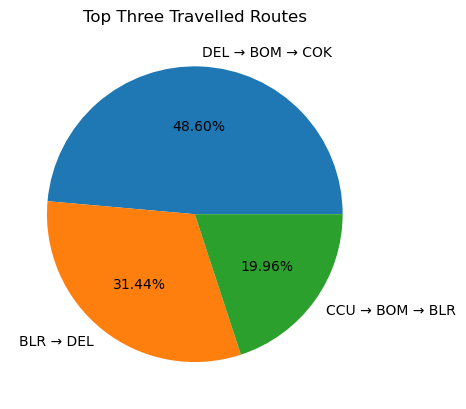

In [315]:
# Here we are supposed to drop the Route but lets see what are the top 3 travelled places
route_val  = df['Route'].value_counts().values
route_index  = df['Route'].value_counts().index
plt.pie(x = route_val[:3], labels= route_index[:3], autopct= "%.2f%%")
plt.title('Top Three Travelled Routes')
plt.plot()


In [316]:
from statistics import mode
df['Total_Stops'] = df['Total_Stops'].fillna(mode(df['Total_Stops']))
df['Total_Stops'].isna().sum()

0

Map Total Stops : We can either use dummies or use map

In [317]:
# df['Total_Stops'] = pd.get_dummies(df['Total_Stops'],dtype=int,drop_first=True)

In [318]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [319]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4})

In [320]:
df.drop('Route',axis=1,inplace=True)

Always make sure you do not have two columns giving the same information

In [321]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time_hours,Arrival_Time_minutes,Dept_Time_hours,Dept_Time_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


when we have multiple Categorical values in a columns we can either convert into a Label Encoder or a One hot encoder 

In [322]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [323]:
df[df['Duration'] == '5m']# Wtf 5 mins flight kinta ameera hei bhai thu XD XD XD

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time_hours,Arrival_Time_minutes,Dept_Time_hours,Dept_Time_minutes
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,5m,2,No info,NaN,12,3,2019,16,55,16,50


Dropping the unwanted rows using the index 

In [324]:
# To drop these we can use the index number 
df.drop([6474,2660],axis = 0, inplace = True)

In [325]:
df[df['Duration'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time_hours,Arrival_Time_minutes,Dept_Time_hours,Dept_Time_minutes


Duration , Since in only require the H for other analysis Here i have taken only H using the strip method

In [326]:
df['Duration_H'] = df['Duration'].apply(lambda x : x.split()[0])
df['Duration_H'].head()


0     2h
1     7h
2    19h
3     5h
4     4h
Name: Duration_H, dtype: object

In [327]:
df['Duration_H'] = df['Duration_H'].apply(lambda x : x.strip('h')) 
# df['Duration_H'] = df['Duration_H'].apply(lambda x : x.strip('m')) # we had one filght duration with 5m
df['Duration_H'] = df['Duration_H'].astype(int)

In [328]:
# simple Exmaple of how strip works
h = 'hari is my name '
b = h.strip('hari')
b

' is my name '

In [329]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time_hours,Arrival_Time_minutes,Dept_Time_hours,Dept_Time_minutes,Duration_H
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7


In [330]:
# df['Duration'] = df['Duration_H'] * 60
# df['Duration'] = df['Duration_H'] * 60 + df['Durtaion_M']

In [333]:
df.drop('Duration',axis =1, inplace= True)

In [334]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time_hours,Arrival_Time_minutes,Dept_Time_hours,Dept_Time_minutes,Duration_H
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7


In [345]:
col = ['Airline','Source','Destination']
for i in col:
    print(df[i].unique())


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [353]:
# For Printing all the Categorical Values in the dataset
for i in df.columns:
    if df[i].dtype == 'O':
        print(df[i].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


Now we will convert the Categorical Values to Numerical

In [355]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = lc.fit_transform(df[i])

In [357]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time_hours,Arrival_Time_minutes,Dept_Time_hours,Dept_Time_minutes,Duration_H
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4
